###Types of Supervised Learning

There are majorly 2 types of supervised learning

1. classification - classification is about predicting a class or discrete values
Eg- male or female, true or false
2. regressing - Regression is about predicting a quantity or continuous values
Eg- Salary, age, price


#**House price Prediction**

We will be using boston house price dataset

### Flow of the project
1. Collection of Dataset
2. Data pre processing
3. Data Analysis
4. Spliting data set into train and test
5. Feed the data to XGBoost Regressor
6. Evaluation of data usign test data

##Importing the required Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the data set

In [ ]:
##house_price_dataset = sklearn.datasets.load_boston()
# The Boston housing prices dataset has an ethical problem: as
# investigated in [1], the authors of this dataset engineered a
# non-invertible variable "B" assuming that racial self-segregation had a
# positive impact on house prices [2]. Furthermore the goal of the
# research that led to the creation of this dataset was to study the
# impact of air quality but it did not give adequate demonstration of the
# validity of this assumption.
##`load_boston` has been removed from scikit-learn since version 1.2.

In [ ]:
house_price_dataset = pd.read_csv('/content/boston.csv')

In [ ]:
#printing the first 5 rows of the data
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#numbers of rows and columns of the data
house_price_dataset.shape

(506, 14)

In [ ]:
#checking for missing values
house_price_dataset.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#checking for missing values
house_price_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
#it will give you the statistical insight(measure) of the data
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset
1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = house_price_dataset.corr()

<AxesSubplot:>

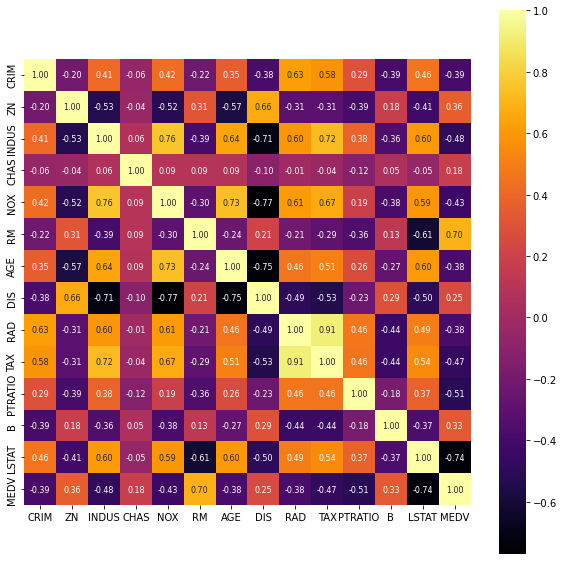

In [ ]:
#construction a heatmap to understand the correlation
plt.figure(figsize= (10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap='inferno')

:Spliting the data and target

In [ ]:
#separating data and labels
X = house_price_dataset.drop(columns='MEDV', axis=1)
#axis = 1 : if you are droping a column
#axis = 2 : if you are droping a row
Y = house_price_dataset['MEDV']

In [ ]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [ ]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (455, 13) (51, 13)


Model Training: Using XGBoost Regressor

In [ ]:
#loading the model
model = XGBRegressor()

Training the model with training data

In [ ]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation of the model

In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
print(X_train_prediction)


[25.245571  23.32921    7.210682  21.154896  11.702352  26.999006
 29.584614  26.544731  43.50524   23.625568  11.002917  33.40945
 36.007214  36.40028   19.037712  20.18499   34.905746  49.99532
 19.321676  14.898901  26.617535  19.894657  24.802687  21.180086
 23.923895  20.586973  23.074522  27.950964  19.987543  23.094906
 25.010534   9.705043  23.892748  36.09172   13.418543  12.731809
 39.79168   10.393237  20.598629  17.775103  19.482315  23.710855
 28.513987  24.29506   23.771362  19.072584  28.377209  20.49642
 33.825535  14.507262  20.39619   16.009405  13.304443  30.793392
 27.49651   24.428276  24.389343  25.122246  43.8164    21.898586
 26.22088   14.255268  20.789656  20.105751  23.099632  13.068087
 16.195873  24.834087  20.208426  22.484184  14.791592  28.696594
 20.114979  23.412987  31.992868  19.124737  49.992138  20.895212
 21.69236   21.999992  17.206669  30.303902  12.287807  21.39682
 20.501791  35.200222  19.602581  22.003605  21.689674  14.086667
 21.088537  15

In [ ]:
#R Square error
score_1 = metrics.r2_score(Y_train, X_train_prediction)
print(score_1)


0.9999952977725205


In [ ]:
#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, X_train_prediction)
print(score_2)

0.01375658535721277


####Evaluation for testing data

In [ ]:
#accuracy on training data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)


[30.359884 27.026636 19.17616  21.448114 20.703493 20.424747 27.9036
 17.878405 21.678137 23.36513  25.411674 33.19199  21.495481 19.939993
 19.990822 28.529932 13.219593 44.483154 25.460302 11.562899 19.486588
 17.153116 24.325785 23.509218 27.791344  8.616411 14.683976 19.01615
 45.651524 12.10203  22.976582 17.523937 48.34446  16.573458 24.024517
 21.818398 14.679352 35.878193 16.073364 20.764208 25.262817 22.376215
 24.78839  14.799538 16.877083 11.262062 46.995094 11.280138 21.217411
 18.637756 23.77302  20.691387 25.980684 20.501291  8.173699 22.731295
 11.759897 24.526464 18.271172 38.32712  12.570583 25.870787 12.011916
 13.295293 17.679295 35.901722 37.55958  23.164257 20.201231 20.955679
 24.68425   7.049963 18.19561  19.824377 19.77468  20.867382 40.98662
 24.473787 27.369884 31.096327 16.441713 19.326612 36.752098  9.891363
 20.98247  25.28127  14.024525 26.155094 21.51227  16.4159   23.28247
 45.429245 15.133404 20.947332 14.996857 20.791437 24.775454 23.958286
 45.176277 

In [ ]:
#R Square error
score_3 = metrics.r2_score(Y_test, X_test_prediction)
print(score_3)

0.9085331557145866


In [ ]:
#mean absolute error
score_4 = metrics.mean_absolute_error(Y_test, X_test_prediction)
print(score_4)

2.344013180452235


Visualizing the actual price and pridicted prices

Text(0.5, 1.0, 'Actual Price vs Predicted Price:For training data')

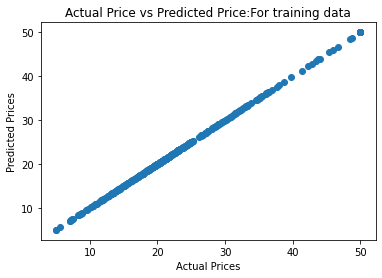

In [ ]:
plt.scatter(Y_train,  X_train_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price:For training data")

Text(0.5, 1.0, 'Actual Price vs Predicted Price:For test data')

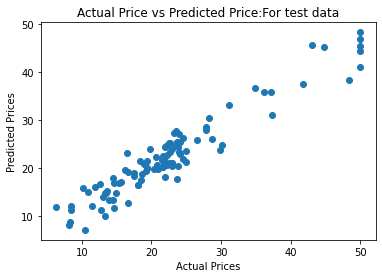

In [ ]:
plt.scatter(Y_test,  X_test_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price:For test data")